CSV contains following fields:
 ['/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/center_2017_02_11_16_27_06_267.jpg', '/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/left_2017_02_11_16_27_06_267.jpg', '/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/right_2017_02_11_16_27_06_267.jpg', '-0.04230542', '0', '0', '13.18453']


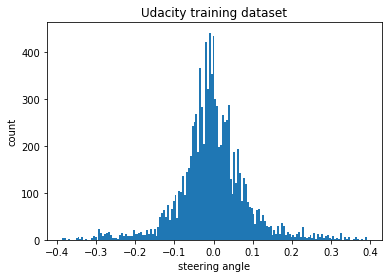

In [11]:
"""The script used to create and train the model."""
from scipy.misc import imread
from sklearn.model_selection import train_test_split

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import logging
import csv
import os
import random

%matplotlib inline

# Inspect training data
image_urls = []
left_urls = []
right_urls = []
angles = []
with open('./data/driving_log.csv', 'r') as f:
    csv_reader = csv.reader(f, skipinitialspace=True)
    headers = next(csv_reader)
    print('CSV contains following fields:\n', headers)
    for row in csv_reader:
        (img_center, img_left, img_right,
         angle, throttle, break_, speed,) = row
        # TODO(Olala): use data from multiple cameras
        image_urls.append(img_center)
        left_urls.append(img_left)
        right_urls.append(img_right)
        angles.append(float(angle))

# draw histogram
plt.hist(angles, bins=160)
plt.title('Udacity training dataset')
plt.ylabel('count')
plt.xlabel('steering angle')
plt.show()


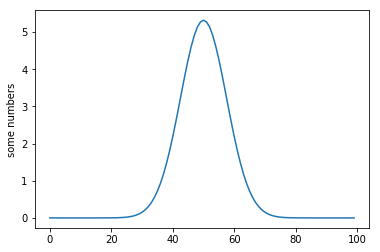

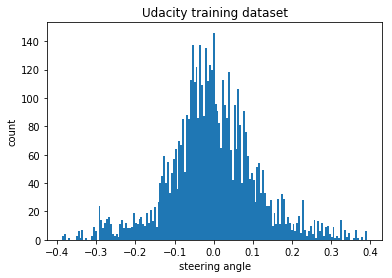

In [45]:

from math import e, sqrt, pi

dropped_angles = []
def gauss(x, mu=0, sigma=0.075):
    a = 1/(sigma*sqrt(2*pi))
    return a*e**(-0.5*(float(x-mu)/sigma)**2)
numbs = [gauss(x * 0.01) for x in range(-50, 50)]
h = gauss(0)
plt.plot(numbs)
plt.ylabel('some numbers')
plt.show()

for angle in angles:
    if random.random() < gauss(angle) *2 / (h*3):
        continue
    else:
        dropped_angles.append(angle)

# draw histogram
plt.hist(dropped_angles, bins=160)
plt.title('Udacity training dataset')
plt.ylabel('count')
plt.xlabel('steering angle')
plt.show()        


CSV contains following fields:
 ['/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/center_2017_02_11_16_27_06_267.jpg', '/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/left_2017_02_11_16_27_06_267.jpg', '/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/right_2017_02_11_16_27_06_267.jpg', '-0.04230542', '0', '0', '13.18453']


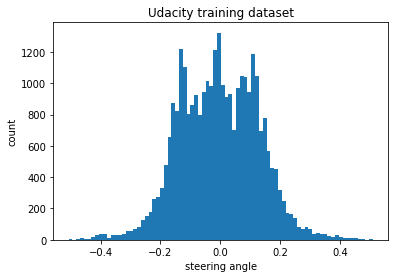

In [8]:
# Inspect training data
img_paths = []
steerings = []
with open('./data/driving_log.csv', 'r') as f:
    csv_reader = csv.reader(f, skipinitialspace=True)
    headers = next(csv_reader)
    print('CSV contains following fields:\n', headers)
    for row in csv_reader:
        (center, left, right, steering, throttle, 
             brake, speed) = row
        steering = float(steering)
        
        img_paths.append(center)
        steerings.append(steering)
        
        # recovery
        recovery_steering = 3./25.
        
        img_paths.append(left)
        steerings.append(steering + recovery_steering)
        img_paths.append(right)
        steerings.append(steering - recovery_steering)

# draw histogram
plt.hist(steerings, bins=160)
plt.title('Udacity training dataset')
plt.ylabel('count')
plt.xlabel('steering angle')
plt.show()



left xxx/Users/hsin-cheng/Udacity/CarND/SDC_P3/data/IMG/left_2017_02_11_16_45_52_038.jpgxxx


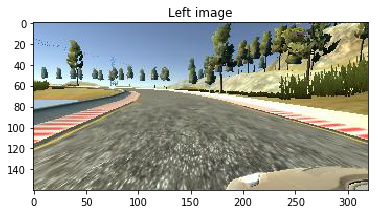

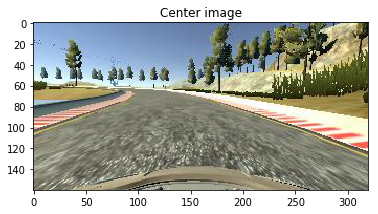

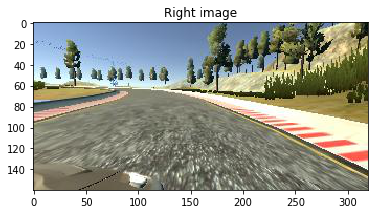

In [9]:
import random

image_urls = np.array(image_urls)
rand_index = random.randint(0, image_urls.shape[0])
center_img_path = image_urls[rand_index]
left_img_path = left_urls[rand_index]
right_img_path = right_urls[rand_index]

# display left image
print('left xxx%sxxx'% left_img_path)
abs_path = os.path.join(os.getcwd(), 'data', left_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Left image')
plt.show()

# display center image
abs_path = os.path.join(os.getcwd(), 'data', center_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Center image')
plt.show()

# display right image
abs_path = os.path.join(os.getcwd(), 'data', right_img_path)
img = mpimg.imread(abs_path)
plt.imshow(img)
plt.title('Right image')
plt.show()


image: (160, 320, 3)


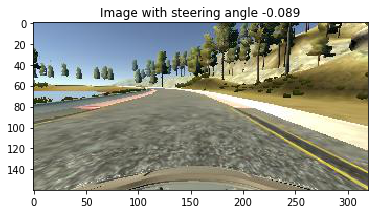

crop_img (100, 300, 3)


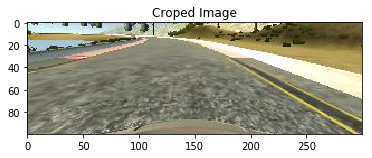

new_img (50, 150, 3)


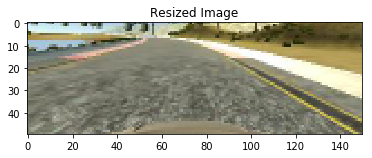

In [5]:
import random
image_urls = np.array(image_urls)

rand_index = random.randint(0, image_urls.shape[0])
rel_path = image_urls[rand_index]
angle = angles[rand_index]
abs_path = os.path.join(os.getcwd(), 'data', rel_path)
img = mpimg.imread(abs_path)
print('image:', img.shape)
plt.imshow(img)
plt.title('Image with steering angle %.3f' % angle)
plt.show()

crop_img = img[50:150, 10:310]
print('crop_img', crop_img.shape)
plt.imshow(crop_img)
plt.title('Croped Image')
plt.show()

new_img = cv2.resize(crop_img, (150, 50))
print('new_img', new_img.shape)
plt.imshow(new_img)
plt.title('Resized Image')
plt.show()
